In [25]:
import pandas as pd
import math

In [41]:
donnee = pd.read_csv('noslignesdedesirs.csv')

In [20]:
donnee
radius = 6371

In [42]:
donnee

,description,latitude,longitude
0,Classes de Hans,45.539105,-73.633135
1,Kevin,45.535550,-73.625195
2,Tamveer,45.539435,-73.633449
3,Kevin,45.539395,-73.632645
4,Riley,45.538959,-73.631368
5,Edison,45.539305,-73.631084
6,Dylan,45.537801,-73.631956


In [26]:
class referencePoint:
    def __init__(self, scrX, scrY, lat, lng):
        self.scrX = scrX
        self.scrY = scrY
        self.lat = lat
        self.lng = lng


# Calculate global X and Y for top-left reference point        
p0 = referencePoint(0, 0, 45.590231380357075, -73.68553872266351)
# Calculate global X and Y for bottom-right reference point
p1 = referencePoint(2244, 2060, 45.55443164693175, -73.59927931059248)

In [27]:
# This function converts lat and lng coordinates to GLOBAL X and Y positions
def latlngToGlobalXY(lat, lng):
     # Calculates x based on cos of average of the latitudes
    x = radius*lng*math.cos((p0.lat + p1.lat)/2)
    # Calculates y based on latitude
    y = radius*lat
    return {'x': x, 'y': y}


In [40]:
pos1 = latlngToGlobalXY(45.539105, -73.633135)
pos1

{'x': 298419.77102574945, 'y': 290129.637955}

In [44]:
pos2 = latlngToGlobalXY(45.535550, -73.625195)
pos2

{'x': 298387.5918582871, 'y': 290106.98905000003}

In [28]:
# This function converts lat and lng coordinates to SCREEN X and Y positions
#https://stackoverflow.com/questions/16266809/convert-from-latitude-longitude-to-x-y
def latlngToScreenXY(lat, lng):
    # Calculate global X and Y for projection point
    pos = latlngToGlobalXY(lat, lng)
    # Calculate the percentage of Global X position in relation to total global width
    perX = ((pos['x']-p0.pos['x'])/(p1.pos['x'] - p0.pos['x']))
    # Calculate the percentage of Global Y position in relation to total global height
    perY = ((pos['y']-p0.pos['y'])/(p1.pos['y'] - p0.pos['y']))

    # Returns the screen position based on reference points
    return {
        'x': p0.scrX + (p1.scrX - p0.scrX)*perX,
        'y': p0.scrY + (p1.scrY - p0.scrY)*perY
    }

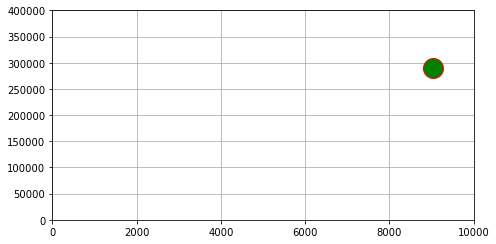

In [38]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
x = [9024.327622329542]
y = [290129.637955]
plt.xlim(0, 10000)
plt.ylim(0, 400000)
plt.grid()
plt.plot(x, y, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.show()

In [45]:
donnee

,description,latitude,longitude
0,Classes de Hans,45.539105,-73.633135
1,Kevin,45.535550,-73.625195
2,Tamveer,45.539435,-73.633449
3,Kevin,45.539395,-73.632645
4,Riley,45.538959,-73.631368
5,Edison,45.539305,-73.631084
6,Dylan,45.537801,-73.631956


In [77]:
pos2 = latlngToGlobalXY(45.535550, -73.625195)
donnee["global_x"],donnee["global_y"] = latlngToGlobalXY(donnee["latitude"],donnee["longitude"]) # not this oneee

In [81]:
pos2 = latlngToGlobalXY(donnee["latitude"],donnee["longitude"])


In [86]:
new column = pos2['x'][0]

298419.77102574945

In [97]:
data_x =pos2['x'].to_numpy()
data_y =pos2['y'].to_numpy()

In [98]:
donnee['global_x'] = data_x
donnee['global_y'] = data_y

In [99]:
donnee

,description,latitude,longitude,global_x,global_y,global_x_test,df_test
0,Classes de Hans,45.539105,-73.633135,298419.771026,290129.637955,None,298419.771026
1,Kevin,45.535550,-73.625195,298387.591858,290106.989050,None,298387.591858
2,Tamveer,45.539435,-73.633449,298421.043602,290131.740385,None,298421.043602
3,Kevin,45.539395,-73.632645,298417.785158,290131.485545,None,298417.785158
4,Riley,45.538959,-73.631368,298412.609743,290128.707789,None,298412.609743
5,Edison,45.539305,-73.631084,298411.458750,290130.912155,None,298411.458750
6,Dylan,45.537801,-73.631956,298414.992784,290121.330171,None,298414.992784


In [68]:
pos_test = latlngToGlobalXY(donnee["latitude"][0],donnee["longitude"][0])

In [70]:
pos_test['x']

298419.77102574945

In [100]:
donnee.drop(columns=['global_x_test','df_test'])

,description,latitude,longitude,global_x,global_y
0,Classes de Hans,45.539105,-73.633135,298419.771026,290129.637955
1,Kevin,45.535550,-73.625195,298387.591858,290106.989050
2,Tamveer,45.539435,-73.633449,298421.043602,290131.740385
3,Kevin,45.539395,-73.632645,298417.785158,290131.485545
4,Riley,45.538959,-73.631368,298412.609743,290128.707789
5,Edison,45.539305,-73.631084,298411.458750,290130.912155
6,Dylan,45.537801,-73.631956,298414.992784,290121.330171


<AxesSubplot:xlabel='global_x', ylabel='global_y'>

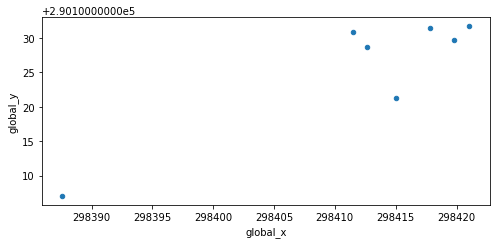

In [102]:
donnee.plot.scatter(x = 'global_x', y = 'global_y')
